# Day 08. Exercise 05
# Clustering

## 0. Imports

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [29]:
df = pd.read_csv('../data/regression.csv')

In [30]:
df = df.drop(columns='pageviews')
df

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [31]:
X = df[["num_commits", "AVG(diff)"]]

In [34]:
kmeans = KMeans(n_clusters=3, random_state=21)
labels = kmeans.fit_predict(X)

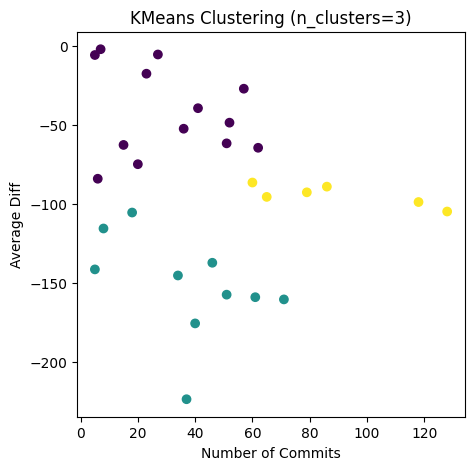

In [35]:
plt.figure(figsize=(5, 5))
plt.scatter(df["num_commits"], df["AVG(diff)"], c=labels, cmap='viridis')
plt.xlabel('Number of Commits')
plt.ylabel('Average Diff')
plt.title(f'KMeans Clustering (n_clusters=3)')
plt.show()

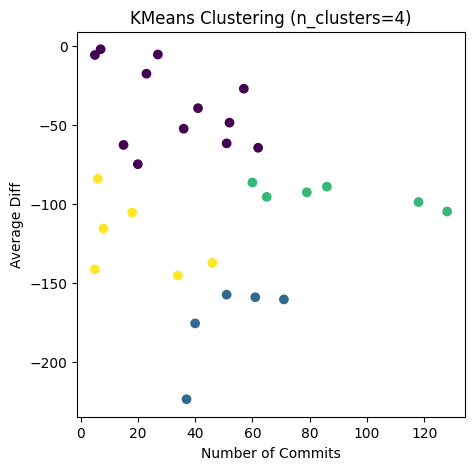

Calculate the `silhouette_score`: 0.41503879936268956


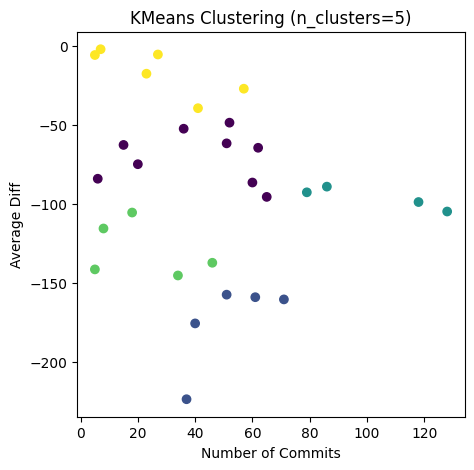

Calculate the `silhouette_score`: 0.3521030626149593


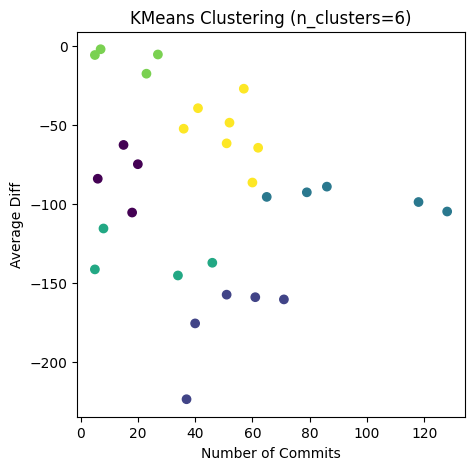

Calculate the `silhouette_score`: 0.3954350435152892


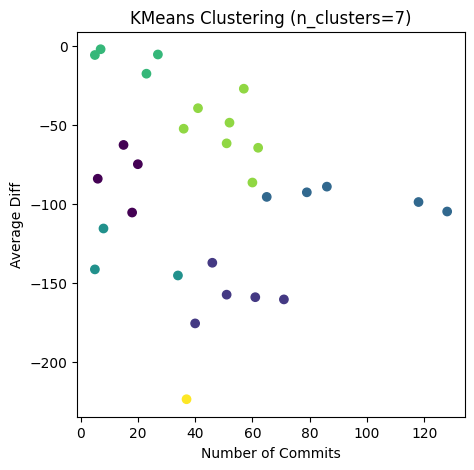

Calculate the `silhouette_score`: 0.39637476619843964


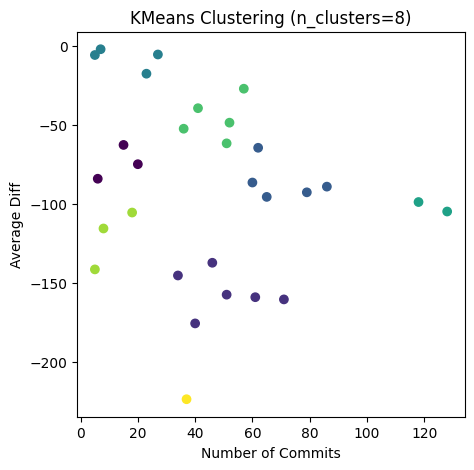

Calculate the `silhouette_score`: 0.48638087320227846


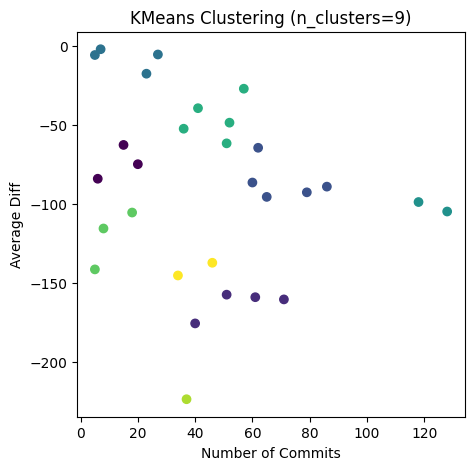

Calculate the `silhouette_score`: 0.45376670441174133


In [36]:
for n in range(4, 10):
    kmeans = KMeans(n_clusters=n, random_state=21)
    labels = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    plt.figure(figsize=(5, 5))
    plt.scatter(df["num_commits"], df["AVG(diff)"], c=labels, cmap='viridis')
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Diff')
    plt.title(f'KMeans Clustering (n_clusters={n})')
    plt.show()
    print(f'Calculate the `silhouette_score`: {sil_score}')

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [41]:
dbscan = DBSCAN(eps=20, min_samples=2)
labels = dbscan.fit_predict(X)

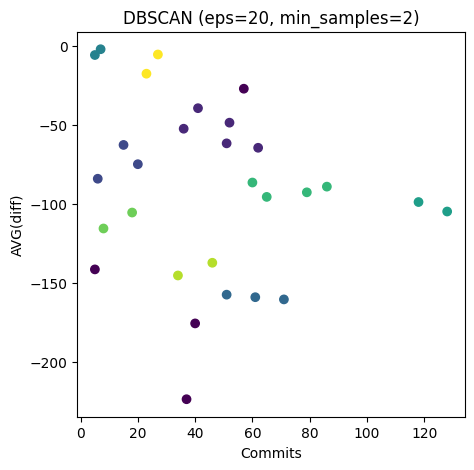

In [42]:
plt.figure(figsize=(5, 5))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=labels, cmap='viridis')
plt.title("DBSCAN (eps=20, min_samples=2)")
plt.xlabel("Commits")
plt.ylabel("AVG(diff)")
plt.show()

In [59]:
eps_values = [21, 22, 23]
min_samples_values = [1, 2, 3]

DBSCAN (eps=21, min_samples=1) score: 0.4361


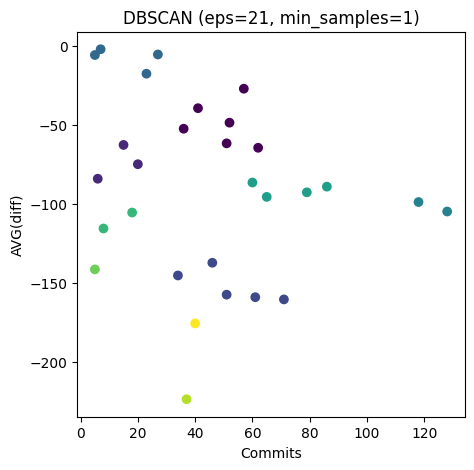

DBSCAN (eps=21, min_samples=2) score: 0.4646


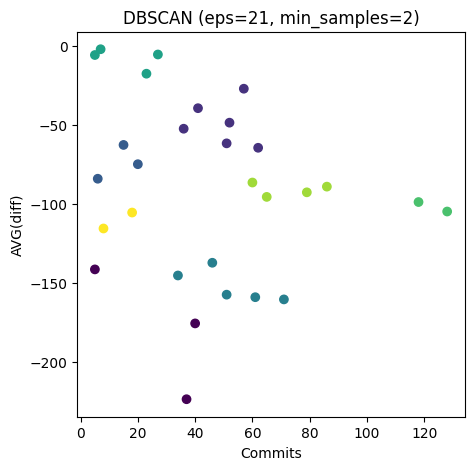

DBSCAN (eps=21, min_samples=3) score: 0.3244


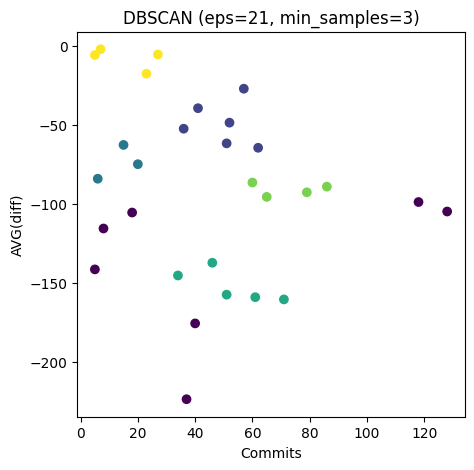

DBSCAN (eps=22, min_samples=1) score: 0.4871


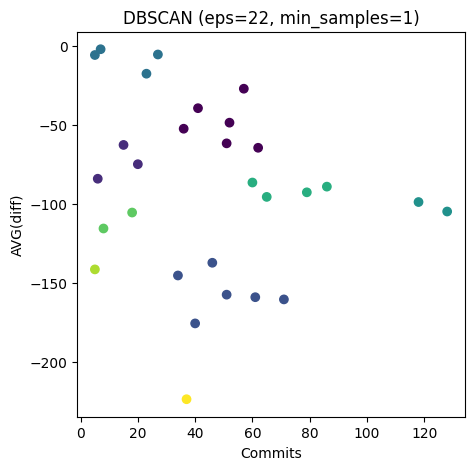

DBSCAN (eps=22, min_samples=2) score: 0.4794


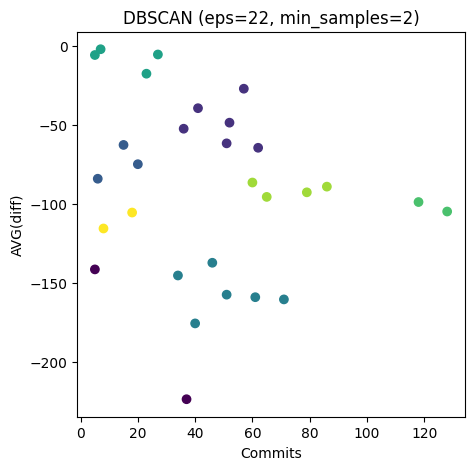

DBSCAN (eps=22, min_samples=3) score: 0.3596


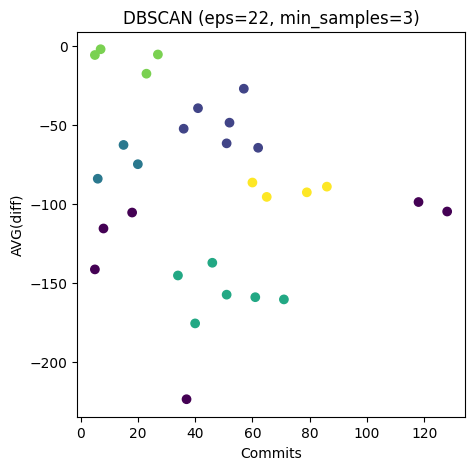

DBSCAN (eps=23, min_samples=1) score: 0.3953


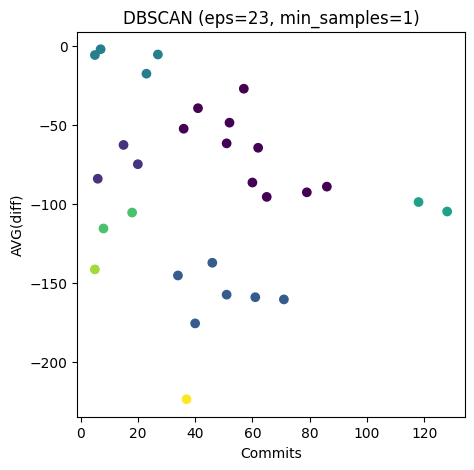

DBSCAN (eps=23, min_samples=2) score: 0.3875


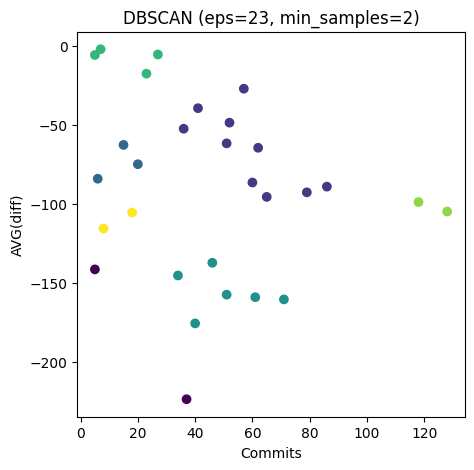

DBSCAN (eps=23, min_samples=3) score: 0.3080


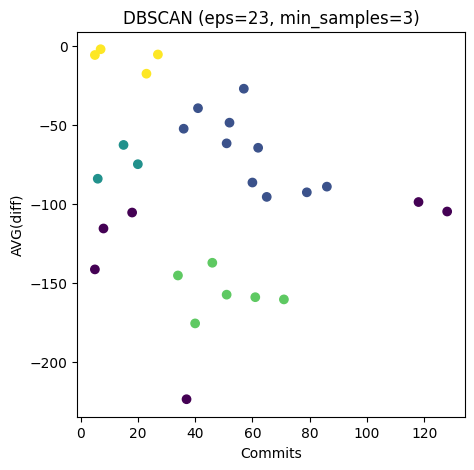

In [60]:
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            print(f"DBSCAN (eps={eps}, min_samples={min_samples}) score: {score:.4f}")
        else:
            print(f"DBSCAN (eps={eps}, min_samples={min_samples}) score: не считается, мало кластеров")
        plt.figure(figsize=(5, 5))  
        plt.scatter(X['num_commits'], X['AVG(diff)'], c=labels, cmap='viridis')
        plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})")
        plt.xlabel("Commits")
        plt.ylabel("AVG(diff)")
        plt.show()

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [65]:
agg = AgglomerativeClustering(n_clusters=5)
labels = agg.fit_predict(X)

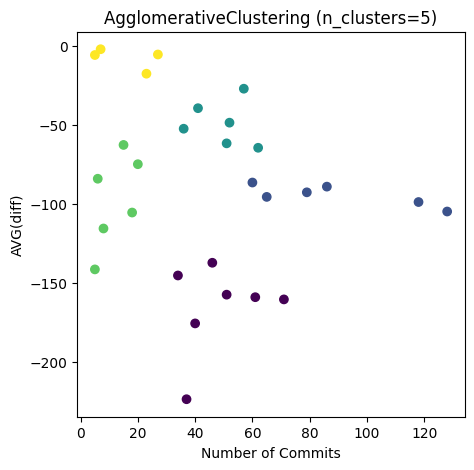

In [66]:
plt.figure(figsize=(5, 5))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=labels, cmap='viridis')
plt.title("AgglomerativeClustering (n_clusters=5)")
plt.xlabel("Number of Commits")
plt.ylabel("AVG(diff)")
plt.show()

Silhouette Score (n_clusters=5): 0.4527145606287827


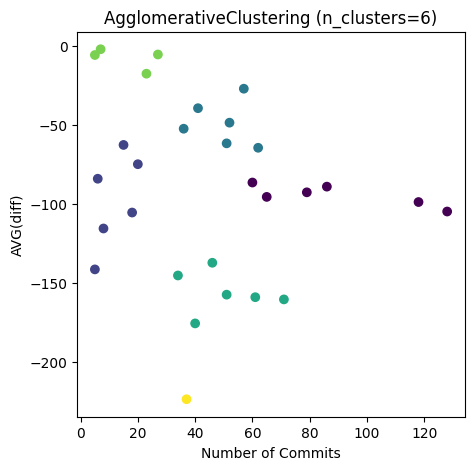

Silhouette Score (n_clusters=5): 0.4865808853184314


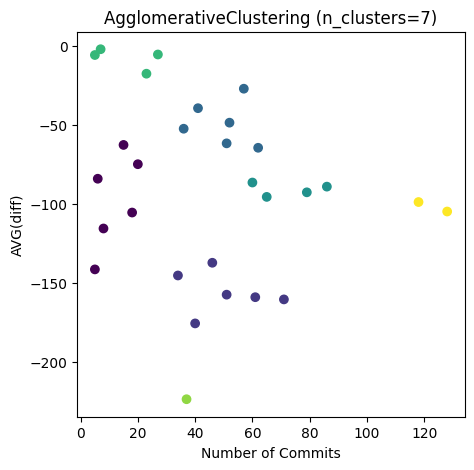

Silhouette Score (n_clusters=5): 0.50779855565622


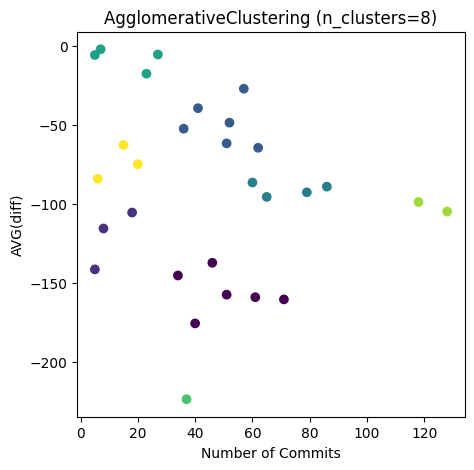

Silhouette Score (n_clusters=5): 0.47576869039147557


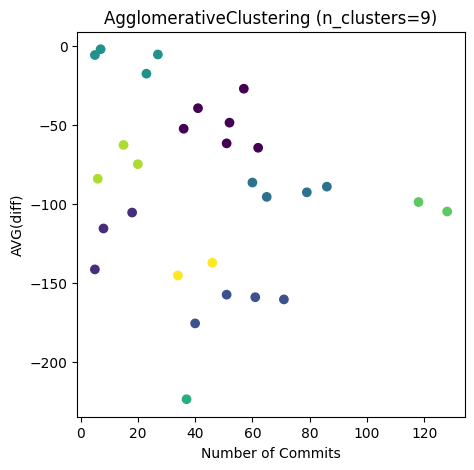

In [67]:
for n in range(6, 10):
    agg = AgglomerativeClustering(n_clusters=n)
    labels = agg.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    print(f'Silhouette Score (n_clusters=5): {sil_score}')
    plt.figure(figsize=(5, 5))
    plt.scatter(X['num_commits'], X['AVG(diff)'], c=labels, cmap='viridis')
    plt.title(f"AgglomerativeClustering (n_clusters={n})")
    plt.xlabel("Number of Commits")
    plt.ylabel("AVG(diff)")
    plt.show()

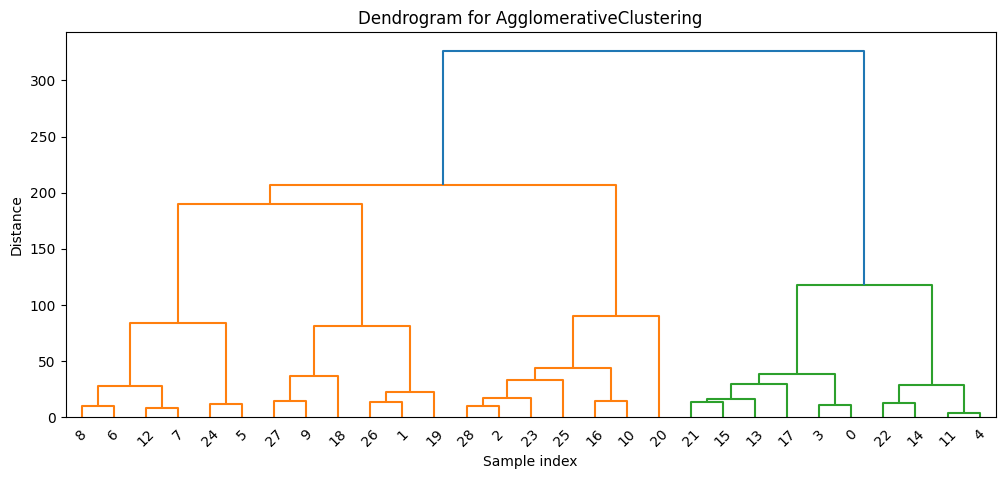

In [74]:
linked = linkage(X, method='ward')
plt.figure(figsize=(12, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for AgglomerativeClustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [99]:
def optimize_clustering(model_class, model_params, param_name, param_range, X):
    silhouette_scores = []
    valid_params = []
    best_labels = None
    best_silhouette = -1
    best_param = None
    
    for param_value in param_range:
        params = model_params.copy()
        params[param_name] = param_value
        model = model_class(**params)
        labels = model.fit_predict(X)
        
        mask = labels != -1
        labels_clean = labels[mask]
        X_clean = X[mask]
        
        if len(set(labels_clean)) > 1:
            silhouette = silhouette_score(X_clean, labels_clean)
            silhouette_scores.append(silhouette)
            valid_params.append(param_value)
            
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_labels = labels
                best_param = param_value
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    
    ax1.plot(valid_params, silhouette_scores, marker='o', color='b')
    ax1.set_title(f"Silhouette Score vs {param_name}")
    ax1.set_xlabel(param_name)
    ax1.set_ylabel("Silhouette Score")
    ax1.grid(True)
    
    plt.scatter(df['num_commits'], df['AVG(diff)'], c=best_labels, cmap='viridis')
    ax2.set_title(f"Best Clustering ({param_name}={best_param}, silhouette={best_silhouette:.4f})")
    ax2.set_xlabel("Number of Commits")
    ax2.set_ylabel("AVG(diff)")
    
    plt.tight_layout()
    return fig


KMeans:


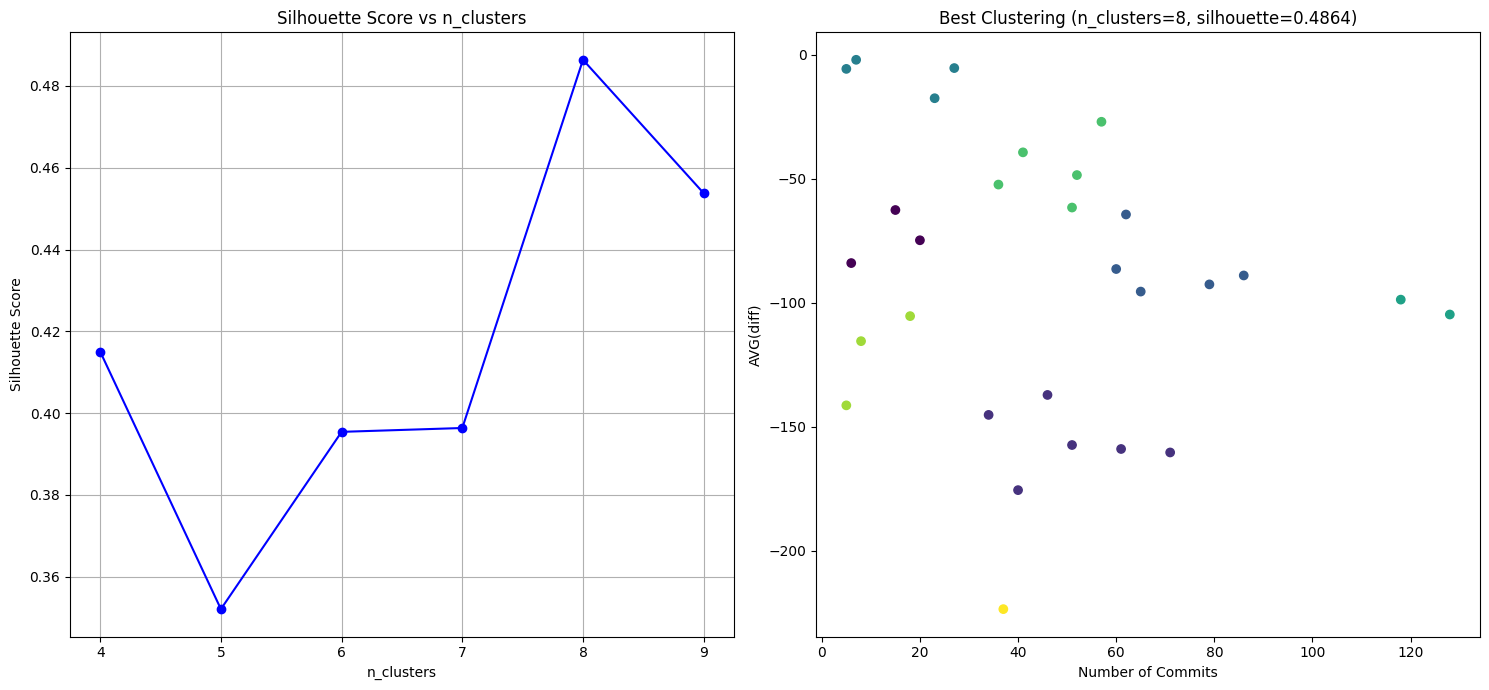


 DBSCAN:


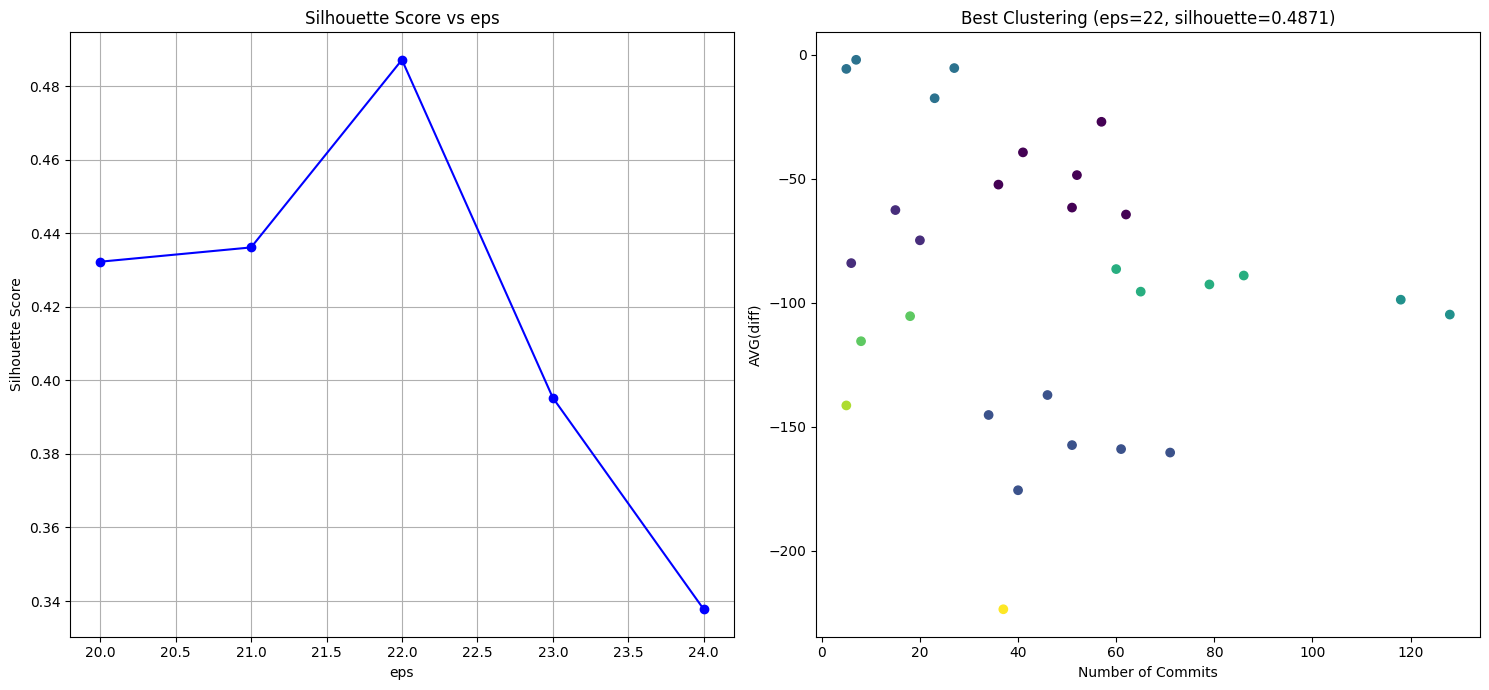


AgglomerativeClustering:


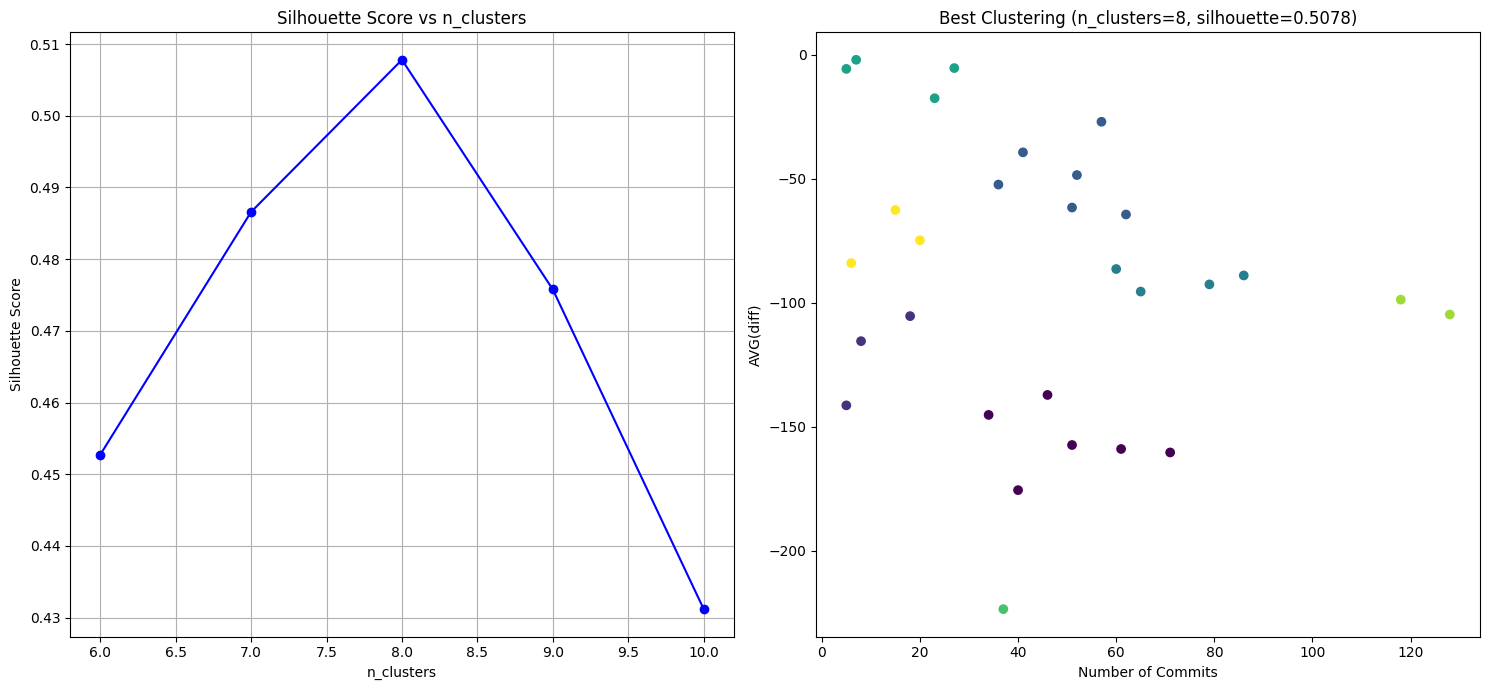

In [100]:
print("\nKMeans:")
fig = optimize_clustering(
    model_class=KMeans,
    model_params={'random_state': 21},
    param_name='n_clusters',
    param_range=[4, 5, 6, 7, 8, 9],
    X=X
)
plt.show()

print("\n DBSCAN:")
fig = optimize_clustering(
    model_class=DBSCAN,
    model_params={'min_samples': 1},
    param_name='eps',
    param_range=[20, 21, 22, 23, 24],
    X=X
)
plt.show()

print("\nAgglomerativeClustering:")
fig = optimize_clustering(
    model_class=AgglomerativeClustering,
    model_params={},
    param_name='n_clusters',
    param_range=[6, 7, 8, 9, 10],
    X=X
)
plt.show()